In [1]:
import numpy as np
import missingno as msno
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
import gensim.downloader as api
from category_encoders import BinaryEncoder
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
exact_duplicated = df.drop_duplicates()
exact_duplicated

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
encoder = BinaryEncoder(cols=['embark_town'])
encoder_data = encoder.fit_transform(df)
encoder_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town_0,embark_town_1,embark_town_2,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,0,0,1,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,0,1,0,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,0,0,1,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,0,0,1,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,0,0,1,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,0,0,1,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,0,0,1,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,0,0,1,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,0,1,0,yes,True


In [4]:
target_means = train.groupby('embark_town')['fare'].mean()
target_means

NameError: name 'train' is not defined

In [ ]:
train['embark_encoded'] = train['embark_town'].map(target_means)
test['embark_encoded'] = train['embark_town'].map(target_means)

In [ ]:
train[['embark_town', 'fare']].head()

,embark_town,fare
529,Southampton,11.5000
609,Southampton,153.4625
219,Southampton,10.5000
458,Southampton,10.5000
834,Southampton,8.3000


In [ ]:
train[['embark_town', 'fare', 'embark_encoded']]

,embark_town,fare,embark_encoded
529,Southampton,11.5000,27.351701
609,Southampton,153.4625,27.351701
219,Southampton,10.5000,27.351701
458,Southampton,10.5000,27.351701
834,Southampton,8.3000,27.351701
...,...,...,...
152,Southampton,8.0500,27.351701
707,Southampton,26.2875,27.351701
685,Cherbourg,41.5792,60.639295
5,Queenstown,8.4583,14.301416


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
missing_counts = df.isnull().sum()
missing_precentages = 100 * df.isnull().sum() / len(df)

missing_table = pd.concat(
    [missing_counts, missing_precentages],
    axis=1,
    keys=['missing_counts', 'missing_precentages']
)

missing_table

,missing_counts,missing_precentages
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


In [ ]:
missing_precentages

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# Select features for imputation
features_for_imputation = ["pclass", "sex", "fare" ,"age"]
titanic_subset = df[features_for_imputation].copy()

In [ ]:
# Encode categorical variable
titanic_subset["sex"] = titanic_subset["sex"].map({"male": 0, "female": 1})

In [ ]:
imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
titanic_imputed = pd.DataFrame(
    imputer.fit_transform(titanic_subset), columns=titanic_subset.columns
)

In [ ]:
titanic_imputed

,pclass,sex,fare,age
0,3.0,0.0,7.2500,22.000000
1,1.0,1.0,71.2833,38.000000
2,3.0,1.0,7.9250,26.000000
3,1.0,1.0,53.1000,35.000000
4,3.0,0.0,8.0500,35.000000
...,...,...,...,...
886,2.0,0.0,13.0000,27.000000
887,1.0,1.0,30.0000,19.000000
888,3.0,1.0,23.4500,21.258419
889,1.0,0.0,30.0000,26.000000


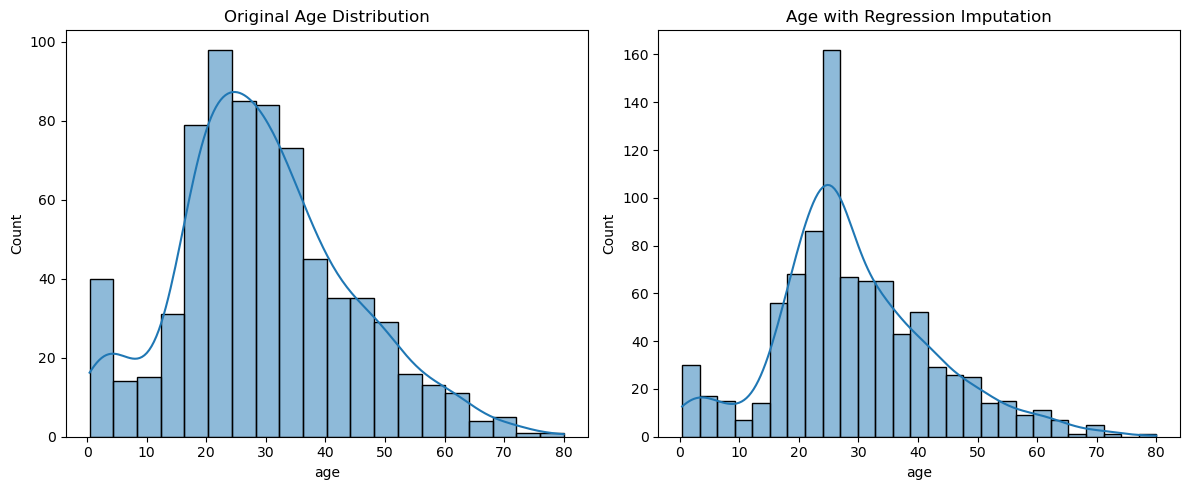

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(titanic_subset["age"], kde=True, ax=ax1)
ax1.set_title("Original Age Distribution")
sns.histplot(titanic_imputed["age"], kde=True, ax=ax2)
ax2.set_title("Age with Regression Imputation")
plt.tight_layout()
plt.show()

In [ ]:
suspicious_values = ['N/A', 'None', '-999', '', ' ']

for column in df.columns:
    if df[column].dtype == 'object':
        value_counts = df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts.index:
                print(
                    f"Column '{column}' contains {value_counts[value]} instances of '{value}'"
                )

In [ ]:
# Mean imputation for 'age'
#df['age_mean_imputed'] = df['age'].fillna(df['age'].mean())


In [ ]:
#df['age_median_imputed'] = df['age'].fillna(df['age'].median())

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df[df['sex'] == 'female']['age'].median()

27.0

In [ ]:
df[df['sex'] == 'male']['age'].median()

29.0

In [ ]:
imputer = KNNImputer(n_neighbors=5)

titanic_knn_imputed = pd.DataFrame(
    imputer.fit_transform(titanic_subset), columns=titanic_subset.columns
)

In [ ]:
titanic_knn_imputed

,pclass,sex,fare,age
0,3.0,0.0,7.2500,22.0
1,1.0,1.0,71.2833,38.0
2,3.0,1.0,7.9250,26.0
3,1.0,1.0,53.1000,35.0
4,3.0,0.0,8.0500,35.0
...,...,...,...,...
886,2.0,0.0,13.0000,27.0
887,1.0,1.0,30.0000,19.0
888,3.0,1.0,23.4500,29.2
889,1.0,0.0,30.0000,26.0


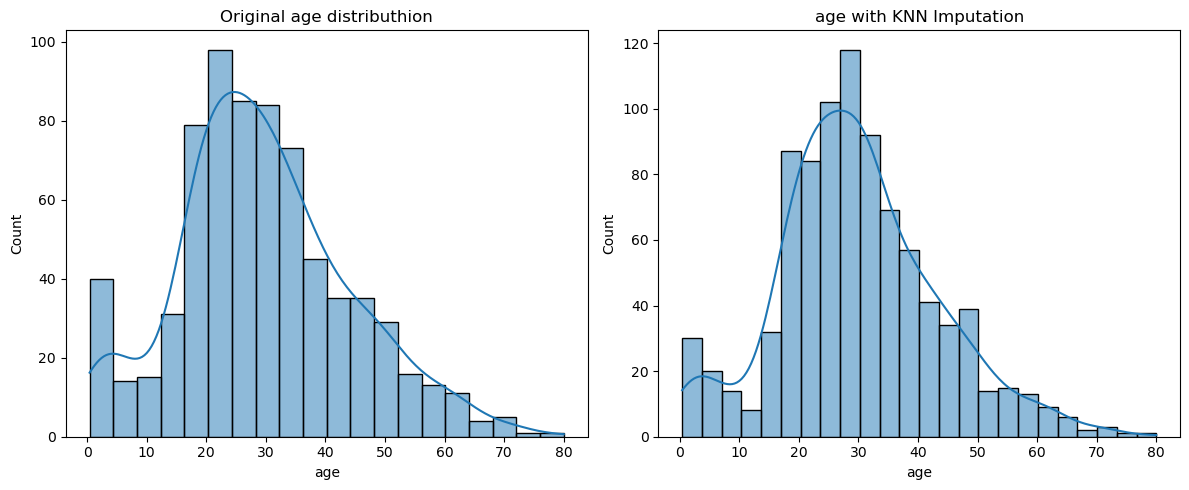

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(titanic_subset['age'], kde=True, ax=ax1)
ax1.set_title('Original age distributhion')
sns.histplot(titanic_knn_imputed['age'], kde=True, ax=ax2)
ax2.set_title('age with KNN Imputation')
plt.tight_layout()
plt.show()

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()
encode_levels = le.fit_transform(df['class'])
encode_levels

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data = df[['sex', 'embarked']]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder_data = encoder.fit_transform(data)
encoder_data

array([[1., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.]], shape=(891, 4))

In [ ]:
encoded_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(data.columns))
encoded_df

,sex_male,embarked_Q,embarked_S,embarked_nan
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
886,1.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [ ]:
df['log_fare'] = np.log(df['fare'])

/home/elahehey79/miniconda3/envs/new-env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_fare', ylabel='fare'>

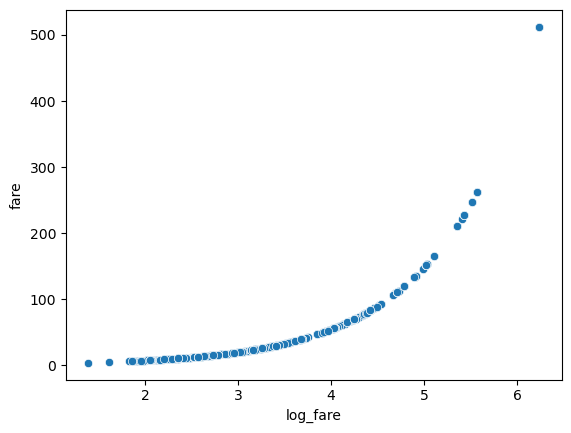

In [ ]:
sns.scatterplot(x='log_fare', y='fare', data=df)

<Axes: xlabel='log_fare', ylabel='Count'>

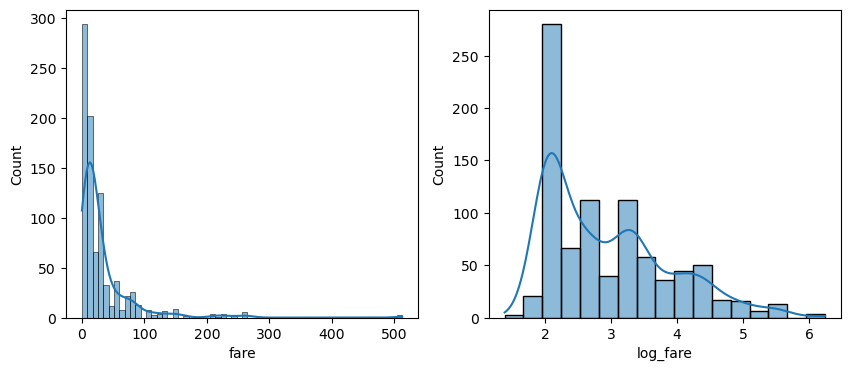

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['fare'], kde=True, ax=ax1)
sns.histplot(df['log_fare'], kde=True, ax=ax2)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,log_fare
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.085672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2.564949
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,3.401197
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3.154870
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,3.401197
